In [3]:
!git clone https://github.com/CPShub/TutorialMLinSolidMechanics.git

fatal: destination path 'TutorialMLinSolidMechanics' already exists and is not an empty directory.


In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

import importlib

import TutorialMLinSolidMechanics.Winter_term_24_25.viscoelasticity.data as ld
importlib.reload(ld)

import TutorialMLinSolidMechanics.Winter_term_24_25.viscoelasticity.plots as lp
importlib.reload(lp)

import TutorialMLinSolidMechanics.Winter_term_24_25.viscoelasticity.core_naive_RNN as hc
importlib.reload(hc)



KeyboardInterrupt: 

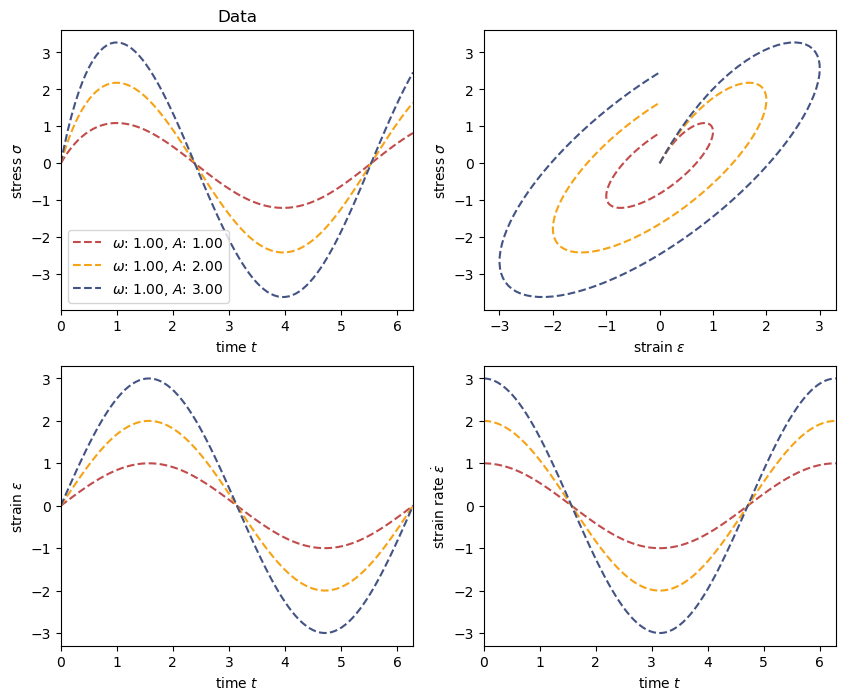

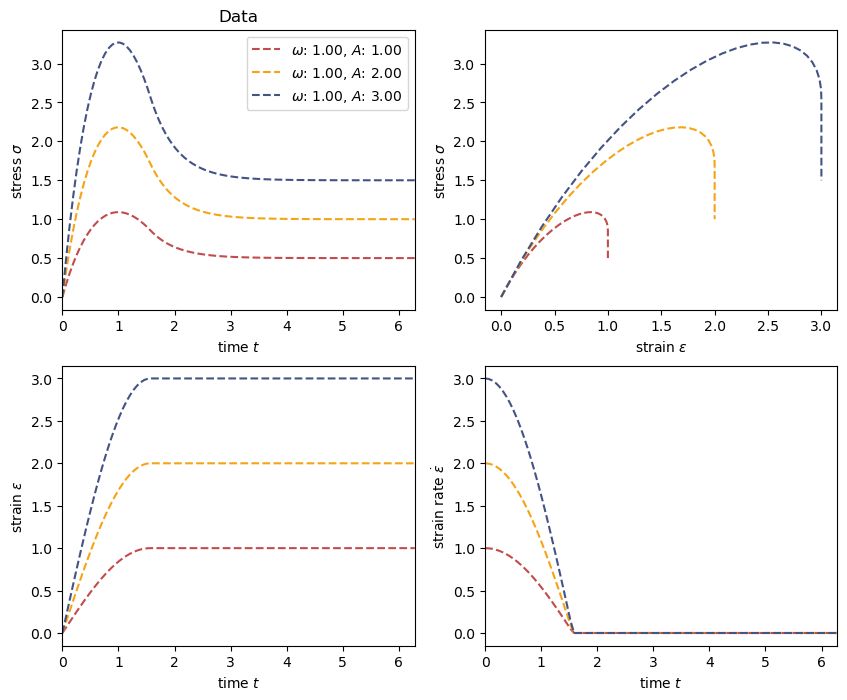

In [ ]:
# Load and visualize data
E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1,1,1]
As = [1,2,3]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
eps_rel, eps_dot_rel, sig_rel, dts_rel = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)

lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_data(eps_rel, eps_dot_rel, sig_rel, omegas, As)

2025-01-21 12:11:22.654173
Epoch 1/10000


/Users/harchaoum/anaconda3/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'rnn_cell', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1/1 - 3s - 3s/step - loss: 0.5456
Epoch 2/10000
1/1 - 0s - 61ms/step - loss: 0.5001
Epoch 3/10000
1/1 - 0s - 65ms/step - loss: 0.4634
Epoch 4/10000
1/1 - 0s - 62ms/step - loss: 0.4358
Epoch 5/10000
1/1 - 0s - 61ms/step - loss: 0.4169
Epoch 6/10000
1/1 - 0s - 67ms/step - loss: 0.4058
Epoch 7/10000
1/1 - 0s - 71ms/step - loss: 0.4011
Epoch 8/10000
1/1 - 0s - 65ms/step - loss: 0.4003
Epoch 9/10000
1/1 - 0s - 60ms/step - loss: 0.4011
Epoch 10/10000
1/1 - 0s - 59ms/step - loss: 0.4013
Epoch 11/10000
1/1 - 0s - 60ms/step - loss: 0.3996
Epoch 12/10000
1/1 - 0s - 57ms/step - loss: 0.3955
Epoch 13/10000
1/1 - 0s - 55ms/step - loss: 0.3891
Epoch 14/10000
1/1 - 0s - 56ms/step - loss: 0.3812
Epoch 15/10000
1/1 - 0s - 59ms/step - loss: 0.3726
Epoch 16/10000
1/1 - 0s - 57ms/step - loss: 0.3639
Epoch 17/10000
1/1 - 0s - 55ms/step - loss: 0.3560
Epoch 18/10000
1/1 - 0s - 58ms/step - loss: 0.3493
Epoch 19/10000
1/1 - 0s - 54ms/step - loss: 0.3441
Epoch 20/10000
1/1 - 0s - 57ms/step - loss: 0.3403
Epoch

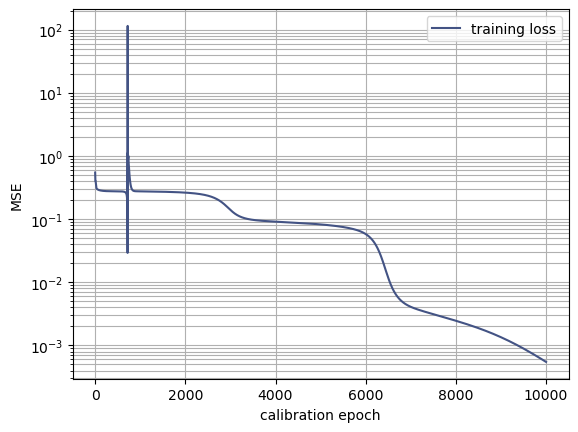

In [ ]:
# Load and evaluate model
model = hc.main()

t1 = now()
print(t1)

model.optimizer.learning_rate.assign(0.002)

h = model.fit([eps, dts], [sig], epochs = 10000,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')


plt.figure(1, dpi=100)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()


### Is the model able to predict seen data - Reproduce data?

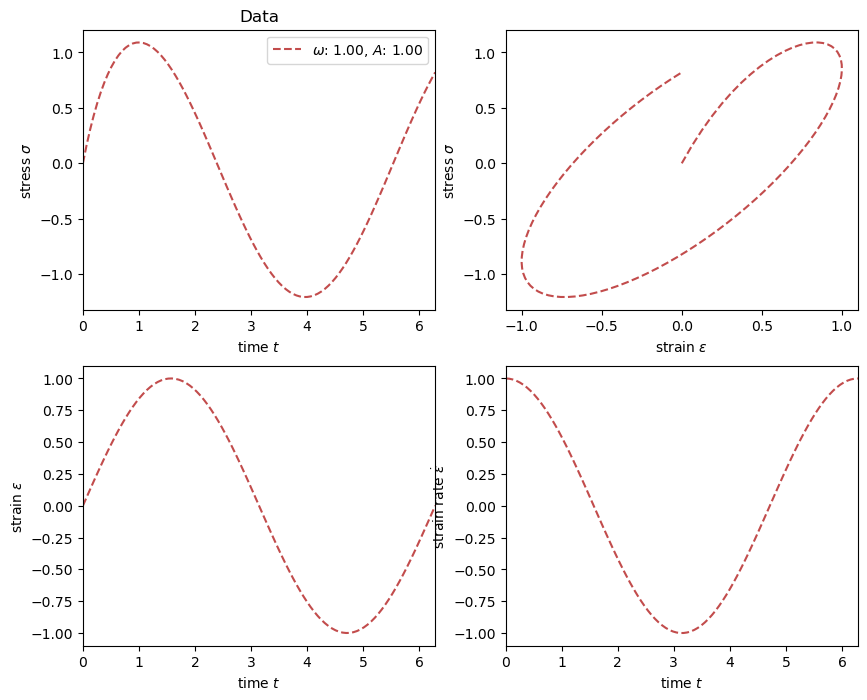

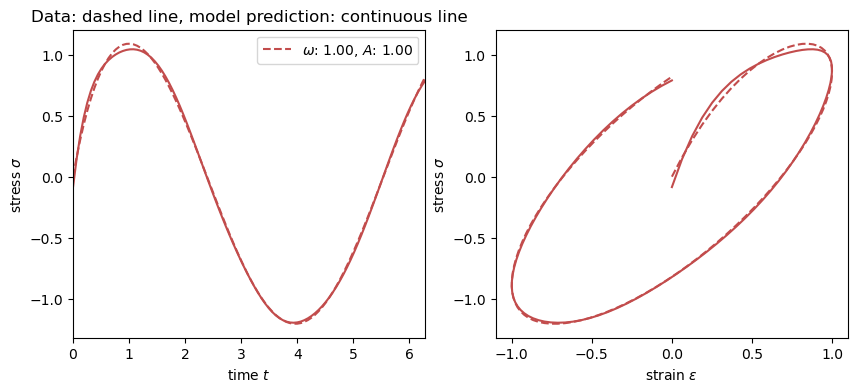

In [ ]:
# Calibration data used for training
E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1]
As = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)